## Projet 5 : Analyser les ecarts de performance entre departements 

### Problematique metier : 

UNe entreprise souhaite analyser les ecarts de performance entre ses departements
en explorant les relations entre variables qualitatives(départements, satisfaction)
et quantitatives (salaire, temps de travail).

### objectif : 
valider les differences en appliquant des tests statistiques

In [19]:
 # importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [20]:
# chargement des données

df = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv")

df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


## Explorations des donnees 

In [21]:
# affichage des statistiques descriptives
print(f"Shape: {df.shape}")
print("\nInformations:")
print(df.info())
print("\nStatistiques descriptives:")
print(df.describe(include='all'))

Shape: (100000, 20)

Informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours          

In [22]:
# afficher tout les noms de colonnes 
print(df.columns)

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')


In [23]:
# afficher les colonnes : Departement , employee_satisfaction_score, performance scores 

print(df[["Department", "Employee_Satisfaction_Score", "Performance_Score"]])

             Department  Employee_Satisfaction_Score  Performance_Score
0                    IT                         2.63                  5
1               Finance                         1.72                  5
2               Finance                         3.17                  3
3      Customer Support                         1.86                  2
4           Engineering                         1.25                  2
...                 ...                          ...                ...
99995           Finance                         1.28                  4
99996                IT                         3.48                  5
99997        Operations                         2.60                  2
99998                HR                         3.10                  5
99999           Finance                         2.64                  1

[100000 rows x 3 columns]


### Analyse des relations entre les variables qualitatives 

### A - test de khi2

en effectuant le test de khi2, on essayeras de voir si il y a une dependence entre la satisfaction des employes et leurs departements.

In [24]:
# test de khi2 sur  la satisfactions des employes et leurs departements
from scipy.stats import chi2_contingency

# calcul de la matrice de contingence
contingency_matrix = pd.crosstab(df['Department'], df['Employee_Satisfaction_Score'])

# test de khi2
chi2, p, dof, expected = chi2_contingency(contingency_matrix)

# affichage des resultats
print(f"Chi2: {chi2:.2f}")
print(f"p-value: {p:.2f}")


Chi2: 3204.30
p-value: 0.48


Selon le test de khi2 observer, il n'y a pas de difference significative entre les satisfactions des employes des differents departements.La statistique chi2 3204.30 montre l'ampleur de la difference entre les frequences observées et les frequences attendues. plus la valeur est grandes, 
plus la difference l'est 

etant donne que la p-value est superieur a 0.05, on peut conclure que la difference n'est pas significative

### B - V de cramer 

afin d'observer si quel pourrais etre la force assosiative entre les variables Department et Employee_Satisfaction_Score, on utilise la fonction v de cramer

In [25]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Calcul de la matrice de contingence
contingency_matrix = pd.crosstab(df['Department'], df['Employee_Satisfaction_Score'])

# Calcul du coefficient de Cramér
cramer_v = cramers_v(contingency_matrix)

print(f"Coefficient de Cramer: {cramer_v:.2f}")

Coefficient de Cramer: 0.06


Le coefficinet de cramer de 0.06 nous confirme donc que la relation entre ces deux variables est faible.

le coefficient de cramer varie de 0 a 1 ou 0 indique aucune association et 1 une association parfaite 

###  Comparaison des moyennes ( quali - quanti)

#### A - analyse de variance  ANOVA

l'analyse de variance ANOVA est une methode statistique qui compare les moyennes entre
plus de deux groupes (données normalement distribuées et
variances homogènes)

ce que l'on feras donc est : 

1-Normalité : On teste la distribution des scores pour chaque département avec le test de Shapiro-Wilk.

2-Homogénéité des variances : On vérifie que les variances sont similaires entre les groupes avec le test de Levene.

3-ANOVA : On réalise le test ANOVA pour comparer les moyennes.

4-Post-hoc : En cas de résultat significatif, on applique le test de Tukey pour identifier précisément les différences.


In [26]:
print(df.columns)

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')


In [27]:
# ANOVA 
from scipy.stats import f_oneway 

# les colonnes interessantes 
data = df[['Department', 'Performance_Score']]

# liste des Departments pour iterer dessus 
Departments = data['Department'].unique()

# verification de la normalite des scores pour chaque Department (test de shapiro-wilk)
print("=== Test de normalité par Departments ===")
for dept in Departments: 
    dept_data = data[data['Department'] == dept]['Performance_Score']
    stat, p_value = stats.shapiro(dept_data)
    print(f"Department {dept} - Statistique = {stat:.4f}, p-value={p_value:.4f}")
    # remarque sur l'interpretation 
    if p_value > 0.05:
        print(" -> Distribution conforme à la normalité")
    else: 
        print(" -> Distribution non conforme à la normalité")
    print("-"*50)

# Verification de l'homogénéité des variances (Test de Levene)
print("\n=== Test d'homogénéité des variances ===")
groups = [data[data['Department'] == dept]['Performance_Score'] for dept in Departments]
Levene_stat, levene_p = stats.levene(*groups)
print(f"Test de Levene - Statistique={Levene_stat:.4f}, p-value={levene_p:.4f}")
if levene_p > 0.05:
    print("Les variances sont homogènes")
else: 
    print("Attention : Les variances diffèrent significativement entre les groupes.")

# Realisation de l'ANOVA 
print("\n=== Realisation de l'analyse de variance ===")
model = ols('Performance_Score ~ C(Department)', data=data).fit()
anova_table = sm.stats.anova_lm(model, type=2)
print(anova_table)

# Analyse post-hoc : si ANOVA est significative (inférieur au seuil de 5%)
anova_p_value = anova_table["PR(>F)"][0]
if anova_p_value < 0.05: 
    print("\nL'ANOVA est significative (p < 0.05). Passage au test post-hoc pour identifier les différences entre Departments")
    tukey = pairwise_tukeyhsd(endog=data['Performance_Score'], groups=data['Department'], alpha=0.05)
    print(tukey)
    # Affichage graphique du résultat du test de Tukey (post-hoc)
    tukey.plot_simultaneous(figsize=(10, 6))
    plt.title("Tukey HSD - Comparaison des moyennes par Department")
    plt.xlabel("Différence de Score de Performance")
    plt.show()
else:
    print("\nL'ANOVA n'est pas significative (p >= 0.05). Aucun test post-hoc n'est nécessaire.")

=== Test de normalité par Departments ===
Department IT - Statistique = 0.8861, p-value=0.0000
 -> Distribution non conforme à la normalité
--------------------------------------------------
Department Finance - Statistique = 0.8881, p-value=0.0000
 -> Distribution non conforme à la normalité
--------------------------------------------------
Department Customer Support - Statistique = 0.8878, p-value=0.0000
 -> Distribution non conforme à la normalité
--------------------------------------------------
Department Engineering - Statistique = 0.8876, p-value=0.0000
 -> Distribution non conforme à la normalité
--------------------------------------------------
Department Marketing - Statistique = 0.8896, p-value=0.0000
 -> Distribution non conforme à la normalité
--------------------------------------------------
Department HR - Statistique = 0.8881, p-value=0.0000
 -> Distribution non conforme à la normalité
--------------------------------------------------
Department Operations - Stati

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11131.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11200.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11116.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\USER\AppData\Local\

Test de Levene - Statistique=1.0518, p-value=0.3940
Les variances sont homogènes

=== Realisation de l'analyse de variance ===
                    df        sum_sq   mean_sq         F    PR(>F)
C(Department)      8.0      15.33215  1.916519  0.957562  0.467323
Residual       99991.0  200127.57936  2.001456       NaN       NaN

L'ANOVA n'est pas significative (p >= 0.05). Aucun test post-hoc n'est nécessaire.


C:\Users\USER\AppData\Local\Temp\ipykernel_31944\417392745.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_p_value = anova_table["PR(>F)"][0]


### Interprétation rapide des résultats :

1. **Test de normalité (Shapiro-Wilk)** :
   - Pour tous les départements (HR, Operations, Sales, Legal), les p-values sont égales à 0.0000.
   - Cela signifie que **les scores de performance ne suivent pas une distribution normale** dans chaque groupe. 

2. **Test d'homogénéité des variances (Levene)** :
   - \( p = 0.3940 \), donc on ne rejette pas l'hypothèse nulle.
   - **Les variances sont homogènes** entre les départements, ce qui respecte une des conditions de l'ANOVA.

3. **ANOVA à un facteur** :
   - \( p = 0.4673 \), donc on ne rejette pas l'hypothèse nulle.
   - **Aucune différence significative** entre les moyennes des scores de performance des différents départements.
   - En d'autres termes, les départements semblent avoir des performances similaires en moyenne.

### Conclusion :
Malgré l'absence de normalité, l'ANOVA a été menée car les tests ANOVA sont relativement robustes aux écarts de normalité avec de grands échantillons (ce qui est le cas ici). Cependant, comme le test n'est pas significatif, on peut conclure que les **départements n'ont pas de différence significative en termes de scores de performance**.



### Test non paramétrique (Kruskal-Wallis)

le test de Kruskal est une alternative a ANOVA et est non parametrique donc ne supposes pas de distribution specifique 

In [28]:
# test de krusal-wallis 
from scipy.stats import kruskal

print("=== Test de Kruskal-Wallis ===")
groups = [data[data['Department'] == dept]['Performance_Score'] for dept in Departments]
kruskal_stat, kruskal_p = kruskal(*groups)
print(f"Statistique de kruskal-wallis  = {kruskal_stat:.4f}, p-value = {kruskal_p:.4f}")


# interpretation des resultat 
if kruskal_p < 0.05:
    print(" Il existe une difference significative entre les departements (p < 0.05).")
    print("Les distributions des scores de performance ne sont pas identiques ")
else: 
    print("Aucune difference significative n'a ete trouvee entre les departements (p >= 0.05)")
    print("Les distributions des scores de performance sont similaires . ")

=== Test de Kruskal-Wallis ===
Statistique de kruskal-wallis  = 7.6579, p-value = 0.4676
Aucune difference significative n'a ete trouvee entre les departements (p >= 0.05)
Les distributions des scores de performance sont similaires . 


### Interprétation des résultats du test de Kruskal-Wallis :

- **Statistique de Kruskal-Wallis = 7.6579**, **p-value = 0.4676**  
- La p-value est bien supérieure à 0.05, donc on **ne rejette pas l'hypothèse nulle**.

### Conclusion :
- **Aucune différence significative** n'a été trouvée entre les départements en termes de scores de performance.
- Cela signifie que les **distributions des scores de performance sont similaires** pour tous les départements.

### Implication :
- Les performances des employés **ne varient pas significativement selon le département**. 




### Test pour les relations quantitatives ( quanti-quanti)

En analysant les relations quantitatives, nous cherchons à démontrer comment les variations d'une variable quantitative influencent ou sont associées aux variations d'une autre variable quantitative

dans notre cas pour repondre a notre probleme ce sera par exemple un analyse sur les scores de performances et les heures de travaille 

In [29]:
print(df.columns)

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')


In [30]:
from scipy.stats import shapiro, spearmanr

# Sélection des variables
data = df[['Performance_Score', 'Work_Hours_Per_Week', 'Overtime_Hours', 'Training_Hours']]

# Test de normalité pour chaque variable
print("=== Test de normalité ===")
for col in data.columns:
    stat, p_value = shapiro(data[col])
    print(f"{col} - Statistique = {stat:.4f}, p-value={p_value:.4f}")
    if p_value > 0.05:
        print(" -> Distribution conforme à la normalité")
    else: 
        print(" -> Distribution non conforme à la normalité")
    print("-"*50)

# Test de corrélation de Spearman pour chaque paire (Performance_Score et les heures)
print("\n=== Tests de corrélation de Spearman ===")
hours_cols = ['Work_Hours_Per_Week', 'Overtime_Hours', 'Training_Hours']
for col in hours_cols:
    spearman_corr, spearman_p = spearmanr(data['Performance_Score'], data[col])
    print(f"Corrélation avec {col} : Coefficient = {spearman_corr:.4f}, p-value = {spearman_p:.4f}")
    if spearman_p < 0.05:
        print(" -> Corrélation significative.")
    else:
        print(" -> Aucune corrélation significative.")
    print("-"*50)


=== Test de normalité ===
Performance_Score - Statistique = 0.8878, p-value=0.0000
 -> Distribution non conforme à la normalité
--------------------------------------------------
Work_Hours_Per_Week - Statistique = 0.9524, p-value=0.0000
 -> Distribution non conforme à la normalité
--------------------------------------------------
Overtime_Hours - Statistique = 0.9522, p-value=0.0000
 -> Distribution non conforme à la normalité
--------------------------------------------------
Training_Hours - Statistique = 0.9545, p-value=0.0000
 -> Distribution non conforme à la normalité
--------------------------------------------------

=== Tests de corrélation de Spearman ===
Corrélation avec Work_Hours_Per_Week : Coefficient = -0.0056, p-value = 0.0752
 -> Aucune corrélation significative.
--------------------------------------------------
Corrélation avec Overtime_Hours : Coefficient = -0.0013, p-value = 0.6777
 -> Aucune corrélation significative.
--------------------------------------------

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


### Interprétation des résultats :

1. **Test de normalité :**  
   - Pour toutes les variables (**Performance_Score**, **Work_Hours_Per_Week**, **Overtime_Hours**, **Training_Hours**), le test de Shapiro-Wilk affiche une p-value de 0.0000, indiquant que **les distributions ne sont pas normales**.  
   - C'est la raison pour laquelle on a choisi le test de corrélation non paramétrique de Spearman.

2. **Tests de corrélation de Spearman :**  
   - **Work_Hours_Per_Week :**  
     - Coefficient = -0.0056, p-value = 0.0752  
     - **Interprétation :** Le coefficient est proche de zéro et la p-value est supérieure à 0.05, ce qui indique **aucune corrélation significative** entre les heures de travail hebdomadaires et le score de performance.
     
   - **Overtime_Hours :**  
     - Coefficient = -0.0013, p-value = 0.6777  
     - **Interprétation :** Là encore, le coefficient est presque nul et la p-value très élevée, suggérant **aucune relation monotone significative** entre les heures supplémentaires et le score de performance.
     
   - **Training_Hours :**  
     - Coefficient = 0.0024, p-value = 0.4551  
     - **Interprétation :** Le coefficient positif mais extrêmement faible, combiné à une p-value bien au-dessus de 0.05, montre qu'il n'existe **aucune corrélation significative** entre les heures de formation et le score de performance.

### Conclusion globale :
Aucune des variables temporelles (heures travaillées, heures supplémentaires, heures de formation) n'explique de manière significative les variations du score de performance. En d'autres termes, d'après ces tests, **il n'existe pas de relation monotone significative** entre le temps consacré à ces activités et la performance des employés.



### Visualisation des Resultat 

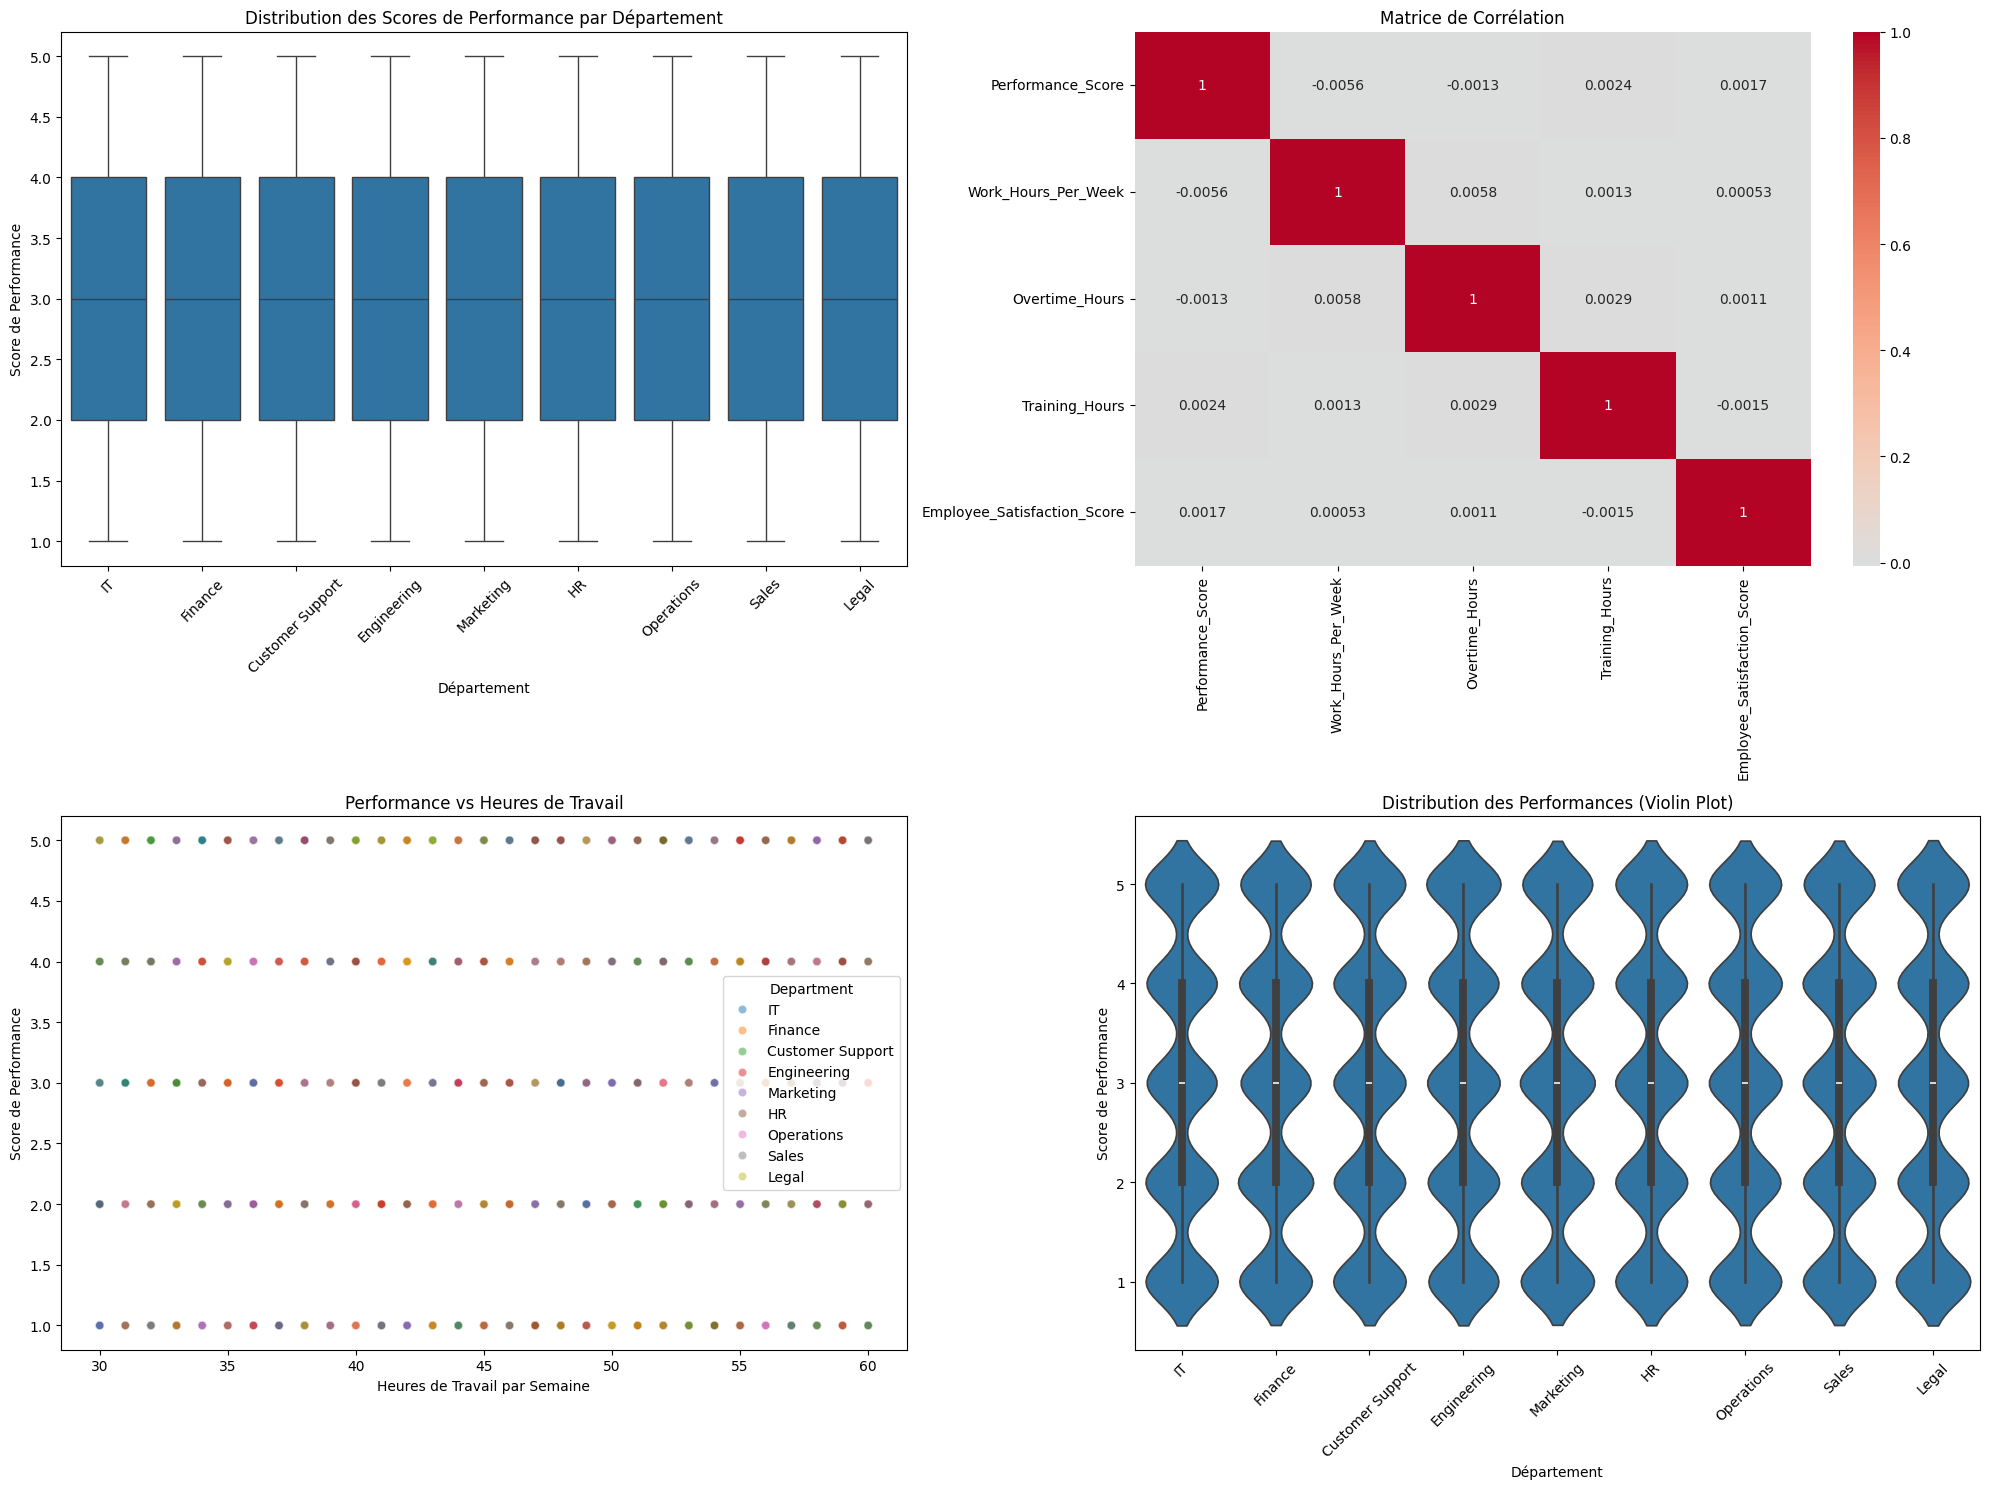

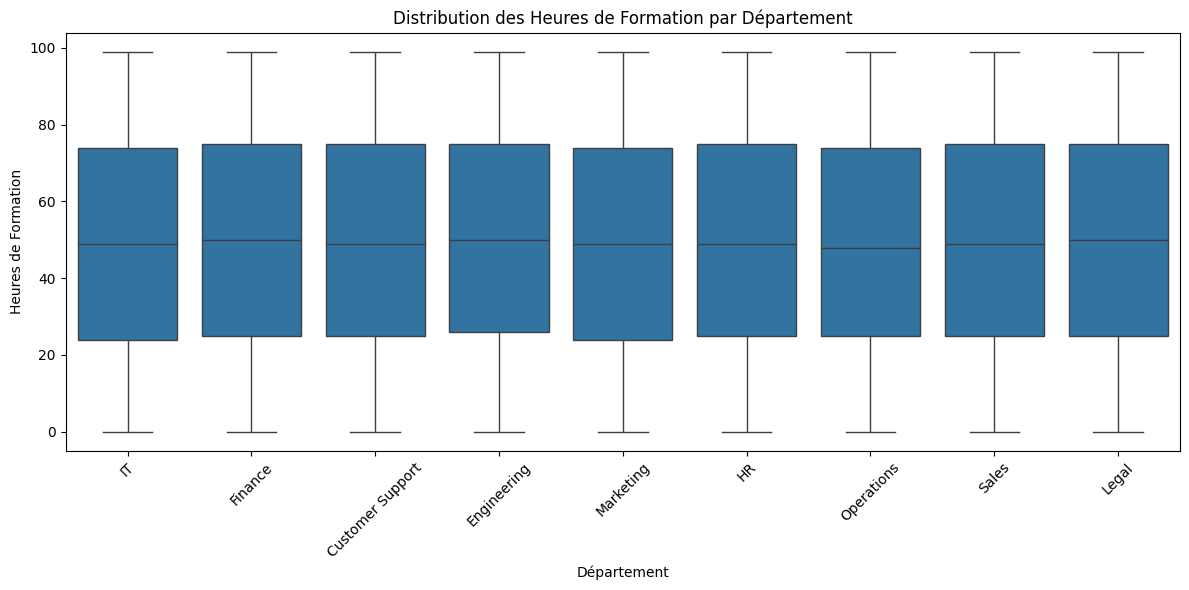

In [17]:
#  figure avec plusieurs sous-graphiques
plt.figure(figsize=(20, 15))

# 1. Boxplot des scores de performance par département
plt.subplot(2, 2, 1)
sns.boxplot(x='Department', y='Performance_Score', data=df)
plt.xticks(rotation=45)
plt.title('Distribution des Scores de Performance par Département')
plt.xlabel('Département')
plt.ylabel('Score de Performance')

# 2. Heatmap des corrélations
plt.subplot(2, 2, 2)
variables = ['Performance_Score', 'Work_Hours_Per_Week', 'Overtime_Hours', 
             'Training_Hours', 'Employee_Satisfaction_Score']
correlation_matrix = df[variables].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation')

# 3. Scatter plot: Performance vs Heures de travail
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Work_Hours_Per_Week', y='Performance_Score', 
                alpha=0.5, hue='Department')
plt.title('Performance vs Heures de Travail')
plt.xlabel('Heures de Travail par Semaine')
plt.ylabel('Score de Performance')

# 4. Violin plot: Distribution des performances
plt.subplot(2, 2, 4)
sns.violinplot(x='Department', y='Performance_Score', data=df)
plt.xticks(rotation=45)
plt.title('Distribution des Performances (Violin Plot)')
plt.xlabel('Département')
plt.ylabel('Score de Performance')

# Ajuster la mise en page
plt.tight_layout()
plt.show()

# Graphique supplémentaire pour les heures de formation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Training_Hours', data=df)
plt.xticks(rotation=45)
plt.title('Distribution des Heures de Formation par Département')
plt.xlabel('Département')
plt.ylabel('Heures de Formation')
plt.tight_layout()
plt.show()

# Conclusions et Recommandations Stratégiques

## Synthèse des Analyses Statistiques

### 1. Écarts de Performance entre Départements
- **Résultats des Tests** : 
  - ANOVA et Kruskal-Wallis montrent aucune différence significative
  - Performance homogène à travers les départements
- **Implications** :
  - Les pratiques actuelles assurent une équité interdépartementale
  - Pas de département sous-performant ou sur-performant

### 2. Relations Satisfaction-Performance
- **Résultats** :
  - Faible association (V de Cramer = 0.06)
  - Satisfaction indépendante du département
- **Implications** :
  - La satisfaction n'explique pas les variations de performance
  - Approche RH uniforme efficace

### 3. Impact des Variables Quantitatives
- **Résultats** :
  - Aucune corrélation significative entre heures travaillées et performance
  - Heures supplémentaires n'influencent pas la performance
- **Implications** :
  - La quantité de travail n'est pas un facteur déterminant
  - Nécessité de focus sur l'efficacité plutôt que le volume

## Recommandations pour l'Entreprise

1. **Maintien de l'Équilibre Inter-départemental**
   - Continuer les pratiques de management équitables
   - Favoriser le partage d'expérience entre départements

2. **Optimisation du Temps de Travail**
   - Réviser la politique des heures supplémentaires
   - Mettre l'accent sur la productivité pendant les heures régulières

3. **Amélioration de la Mesure de Performance**
   - Développer des indicateurs plus qualitatifs
   - Mettre en place un système d'évaluation standardisé

4. **Actions Spécifiques par Département**
   - Maintenir l'autonomie des départements
   - Adapter les objectifs aux spécificités de chaque service

